In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv",sep = ',')
data_description = pd.read_fwf("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt")
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv",sep = ',')
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv",sep = ',')

In [34]:
train.columns
train.shape

(1460, 81)

In [4]:
train['SalePrice'].describe()
#train.head()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
test.dtypes
test.head()
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## SalePrice

Analysis on the SalePrice variable that we are predicting.

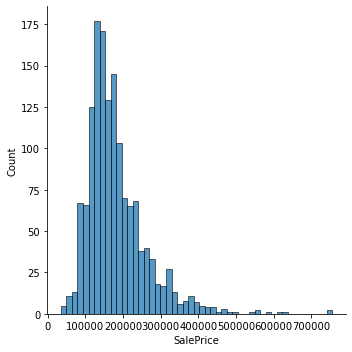

In [6]:
#looking at the distribution of sale prices, it deviates from normal distribution and is skewed to the right. 
#This will need to be fixed later to be more normally distributed before fitting the model.
sns.displot(train['SalePrice'])

Next we began testing the relationship between 'SalePrice' and other variables, trying to find positive relationships.

### LotArea

<function matplotlib.pyplot.show(close=None, block=None)>

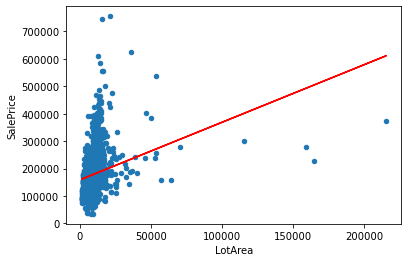

In [7]:
data = pd.concat([train["SalePrice"], train['LotArea']], axis =1)
data.plot.scatter(x='LotArea', y='SalePrice')
m, b = np.polyfit(train["LotArea"], train["SalePrice"], 1)
plt.plot(train["LotArea"], m*train["LotArea"] + b, color="red")
plt.show

### GrLivArea

<function matplotlib.pyplot.show(close=None, block=None)>

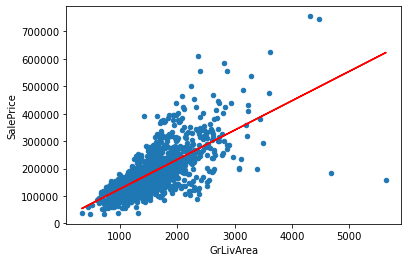

In [8]:
# 'GrLivArea' and 'SalePrice' show a linear trend.
data = pd.concat([train["SalePrice"], train['GrLivArea']], axis =1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

m, b = np.polyfit(train["GrLivArea"], train["SalePrice"], 1)
plt.plot(train["GrLivArea"], m*train["GrLivArea"] + b, color="red")
plt.show

### TotalBsmtSF

<function matplotlib.pyplot.show(close=None, block=None)>

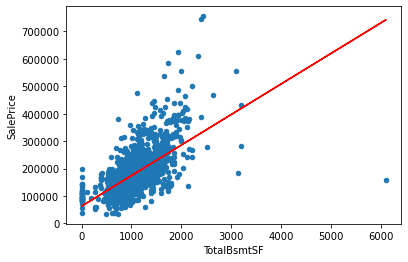

In [9]:
#'SalePrice' and ' TotalBsmtSF' show a linear trend.
data = pd.concat([train["SalePrice"], train['TotalBsmtSF']], axis =1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')
m, b = np.polyfit(train["TotalBsmtSF"], train["SalePrice"], 1)
plt.plot(train["TotalBsmtSF"], m*train["TotalBsmtSF"] + b, color="red")
plt.show

### OverallQual

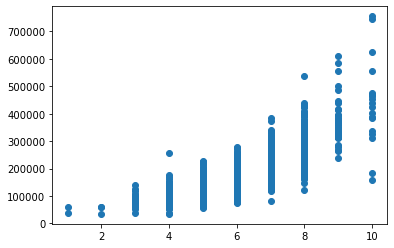

In [10]:
#We first tried using a scatterplot to see the relationship between 'OverallQual' and 'SalPrice', but since 'OverallQual' is a categorical variable, 
#we decided that the scatterplot might not be best visual for these variables.
plt.scatter(train['OverallQual'],train['SalePrice'])

(-0.5, 9.5, 0.0, 800000.0)

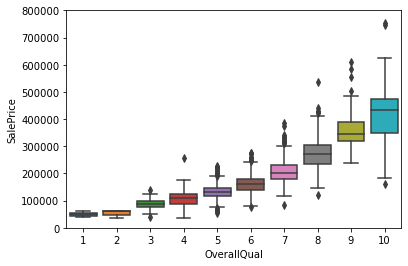

In [11]:
#Next we tried using a boxplot to better visualize the relationship between 'OverallQual' and 'SalPrice', and it shows that higher quality houses have a higher SalePrice.
data = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
bplot = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
bplot.axis(ymin=0, ymax=800000)

### YearBuilt

<function matplotlib.pyplot.show(close=None, block=None)>

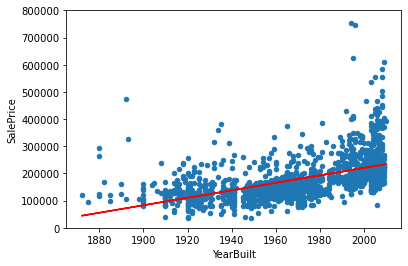

In [12]:
# Using a scatterplot shows a linear growth trend between 'YearBuilt' and "SalePrice'.
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis = 1)
splot = data.plot.scatter(x='YearBuilt', y='SalePrice')
splot.axis(ymin=0, ymax=800000)

m, b = np.polyfit(train["YearBuilt"], train["SalePrice"], 1)
plt.plot(train["YearBuilt"], m*train["YearBuilt"] + b, color="red")
plt.show
#f, ax = plt.subplots(figsize=(16,8))
#bplot = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
#bplot.axis(ymin=0, ymax=800000)
#plt.xticks(rotation=90)

### Relationship Matrix

<AxesSubplot:>

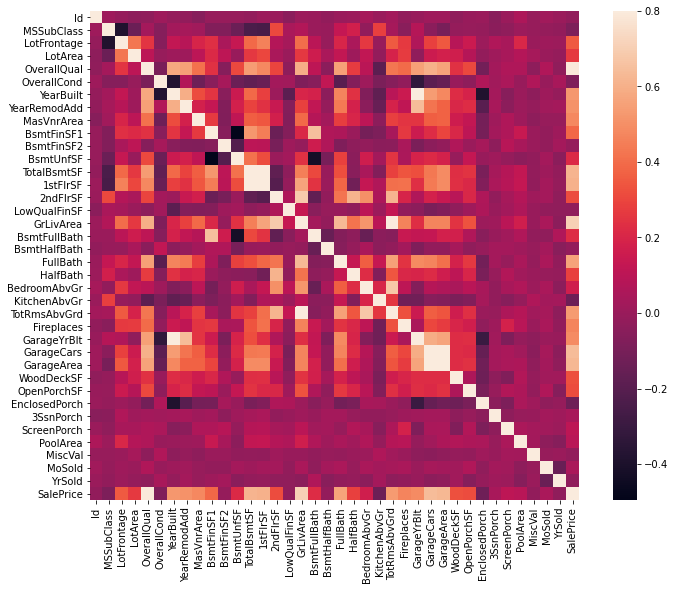

In [13]:
#The relationship matrix gives us another look at the strength of the relationships between two variables, confirming our findings of 'SalePrice' relationships with 'OverallQual', 'GrLivArea', and 'TotalBsmtSF'.
# We can also use the matrix to confirm that other relationships are stronger than 'SalePrice' and 'LotArea'.
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

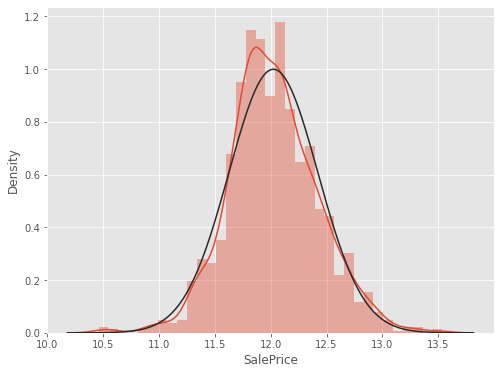

In [14]:
# Now, we fix the distribution of the 'SalePrice' by transforming the variable. As we stated earlier, the distribution was non-normal and skewed to the right.
# In order to fit the model, we need to fix the distribution.

import scipy.stats as stats

train["SalePrice"] = np.log(train["SalePrice"])
plt.style.use('ggplot')
plt.figure(figsize = (8,6))
sns.distplot(train.SalePrice, fit = stats.norm)
plt.show

### Missing Data
    Identifying the missing data and replacing it.

##### Identifying Missing Data

In [24]:
#Concatenating train and test dfs

all_data = pd.concat((train, test))
print(all_data.shape)

(2919, 81)


In [22]:
# Before finding a method to replace the missing data, we first wanted to see a summary. Looking at the type of data that is missing, we can assume that if a particular field is missing, then the house does not have that feature. We can replace the missing values with 0's.
all_data_missing = all_data.isnull().sum()
all_data_missing = all_data_missing[all_data_missing>0]
all_data_missing.sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

##### Replacing Missing Data

In [99]:
#Making a separate DF with only the relevant columns that will be used when training the model. those columns are: GrLivArea, TotalBsmtSF, YearBuilt, OverallQual, SalePrice.

clean_train = train[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallQual', 'SalePrice']]
clean_train.isnull().sum()

GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
OverallQual    0
SalePrice      0
dtype: int64

In [46]:
#Doing the same for the test df, with the exception of SalePrice

clean_test = train[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallQual']]
clean_test.isnull().sum()

GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
OverallQual    0
dtype: int64

## Linear Regression

##### Libraries

In [111]:
from sklearn.linear_model import LinearRegression

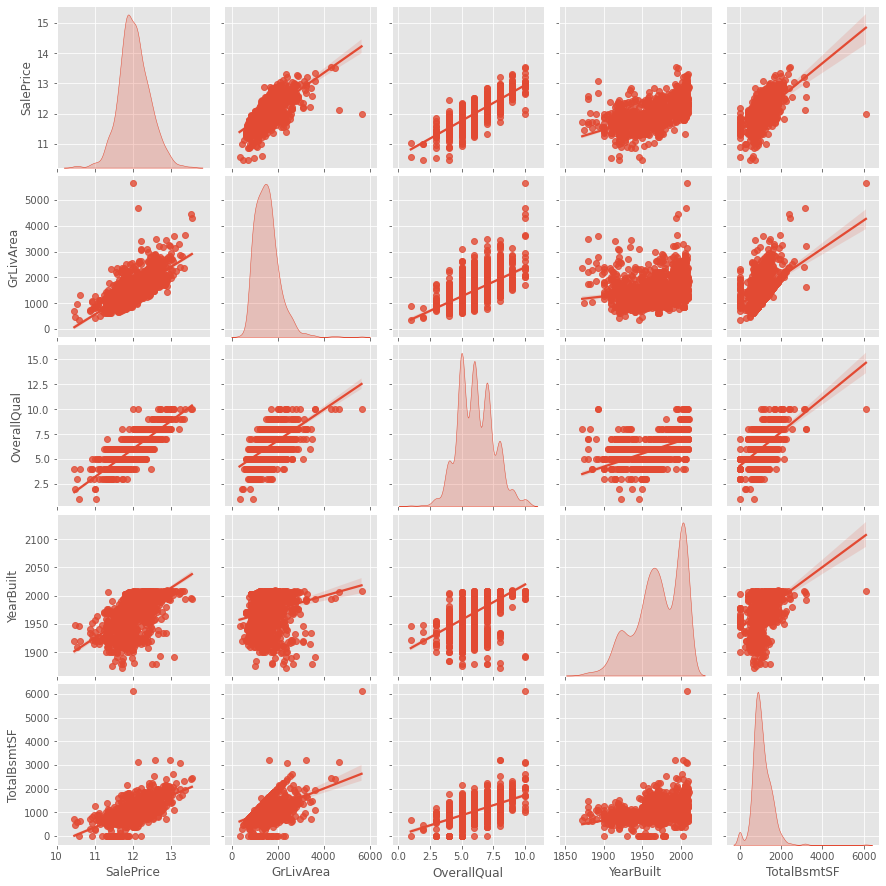

In [80]:
sel_columns = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']
data_sel = clean_train[sel_columns]
train_pairplot = sns.pairplot(data_sel, kind='reg', diag_kind='kde')
train_pairplot

### 

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_train.drop('SalePrice', axis=1), clean_train['SalePrice'], test_size=0.3)

In [125]:
#LinReg.fit(x_train, y_train)
LinReg = LinearRegression()
y_test = y_test.values.reshape((-1, 1))
y_train = y_train.values.reshape((-1, 1))
LinReg.fit(x_train, y_train)
print(LinReg)

#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()


In [140]:
predict_y = LinReg.predict(X_test)

In [142]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

0.14739614379600374


In [138]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

0.1699749908762035


In [145]:
#R^2
LinReg.score(X_test, y_test)

-0.022662383561682153

In [133]:
#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

0.30180079483625416


### Diagnostics

(array([  4.,  15.,  34., 105., 117.,  78.,  50.,  24.,   9.,   2.]),
 array([-1.16506821, -0.91743534, -0.66980248, -0.42216961, -0.17453674,
         0.07309612,  0.32072899,  0.56836185,  0.81599472,  1.06362758,
         1.31126045]),
 <BarContainer object of 10 artists>)

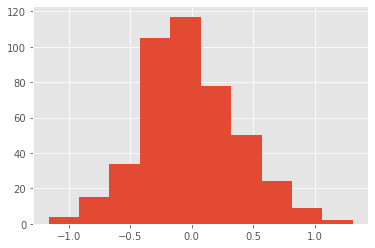

In [146]:
import matplotlib.pyplot as plt
plt.hist(y_test - predict_y)

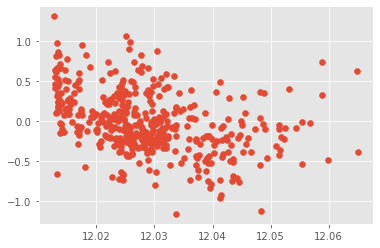

In [147]:
plt.scatter(predict_y, y_test - predict_y)

In [150]:
print(LinReg.coef_)

[[ 1.01296509e-05 -1.05100531e-05 -3.13554819e-04  1.25975613e-04]]


Coefficients in multiple linear models represent the relationship between the given feature, X_i and the target, y, assuming that all the other features remain constant (conditional dependence). This is different from plotting X_i versus y and fitting a linear relationship: in that case all possible values of the other features are taken into account in the estimation (marginal dependence).